In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# print(x_train)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.1
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8685 - loss: 0.4603 - val_accuracy: 0.9657 - val_loss: 0.1282
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9608 - loss: 0.1334 - val_accuracy: 0.9723 - val_loss: 0.0984
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9729 - loss: 0.0905 - val_accuracy: 0.9768 - val_loss: 0.0845
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9815 - loss: 0.0638 - val_accuracy: 0.9753 - val_loss: 0.0801
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9844 - loss: 0.0479 - val_accuracy: 0.9785 - val_loss: 0.0763


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.0854
Test accuracy: 97.61%


In [ ]:
index = np.random.randint(0, len(x_test))
test_image = x_test[index]
true_label = y_test[index]

In [ ]:
input_image = np.expand_dims(test_image, axis=0)

In [ ]:
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


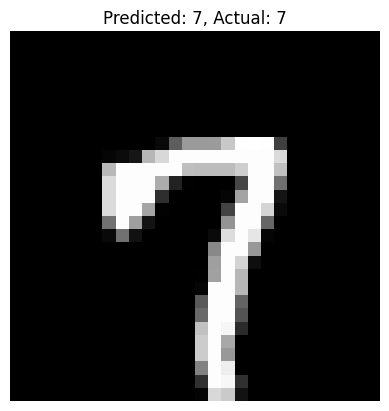

In [ ]:
plt.imshow(test_image, cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {true_label}")
plt.axis('off')
plt.show()